## TOPAZ: TOpologically-based Parameter inference for Agent-based model optimiZation

This code has three big sections: the simulation or topological data analysis (TDA) step, the approximate Bayesian computation step (ABC), and the Bayesian information criterion step (BIC).


<img src="mega_w_pic_dark.png" alt="My Plot" width="800"/>

In [1]:
# necessary imports needed throughout
from IPython.display import Image,display, HTML

### Step 1: Topological Data Analysis

#### 1a. Simulate the ABM simulation

In [3]:
from Modules.TDA1_run_CLW_sim import run_CLW_sim

'''Run ABM simulation for chosen values of C, L, and W over a specified time period

Inputs:
    C - Ratio of magnitude of attractive and respulive forces
    L - Ratio of range of attractive and respulive forces
    W - Alignment parameter
    T0 - Initial time of simulation
    TF - End time of simulation
    DT - How often to make a new frame of data
    num_agents - number of cell agents to be in the simulation

Requirements:
    ic_vec.npy - vector of initial conditions
    
Output: 
    df.pkl - the resulting TDA dataframe of cells over the simulation
    TDA_simulation.gif - gif of chosen C,L,W simulation
    
'''
# pick the inputs 
# Pick C between 1 and 30
C = 17
# Pick L between 1 and 30
L = 3
# Pick W between 0 and 10
W = 5

T0 = 1
TF = 21
DT = 1/6

num_agents = 300

# run the simulation
run_CLW_sim(C,L,W,T0,TF,DT,num_agents)

# display simulation gif
CLW_gif_name = f"Chosen_C_{str(C).zfill(2)}_L_{str(L).zfill(2)}_W_{str(W).zfill(2)}/TDA_simulation.gif"
display(HTML(f'<img src="{CLW_gif_name}" />'))

This simulation will represent our "ground truth" baseline moving forward.

#### 1b. Run TDA to get the Betti-0 and Betti-1 crocker matrices for your (C, L, W) combination

300 points in frame 119

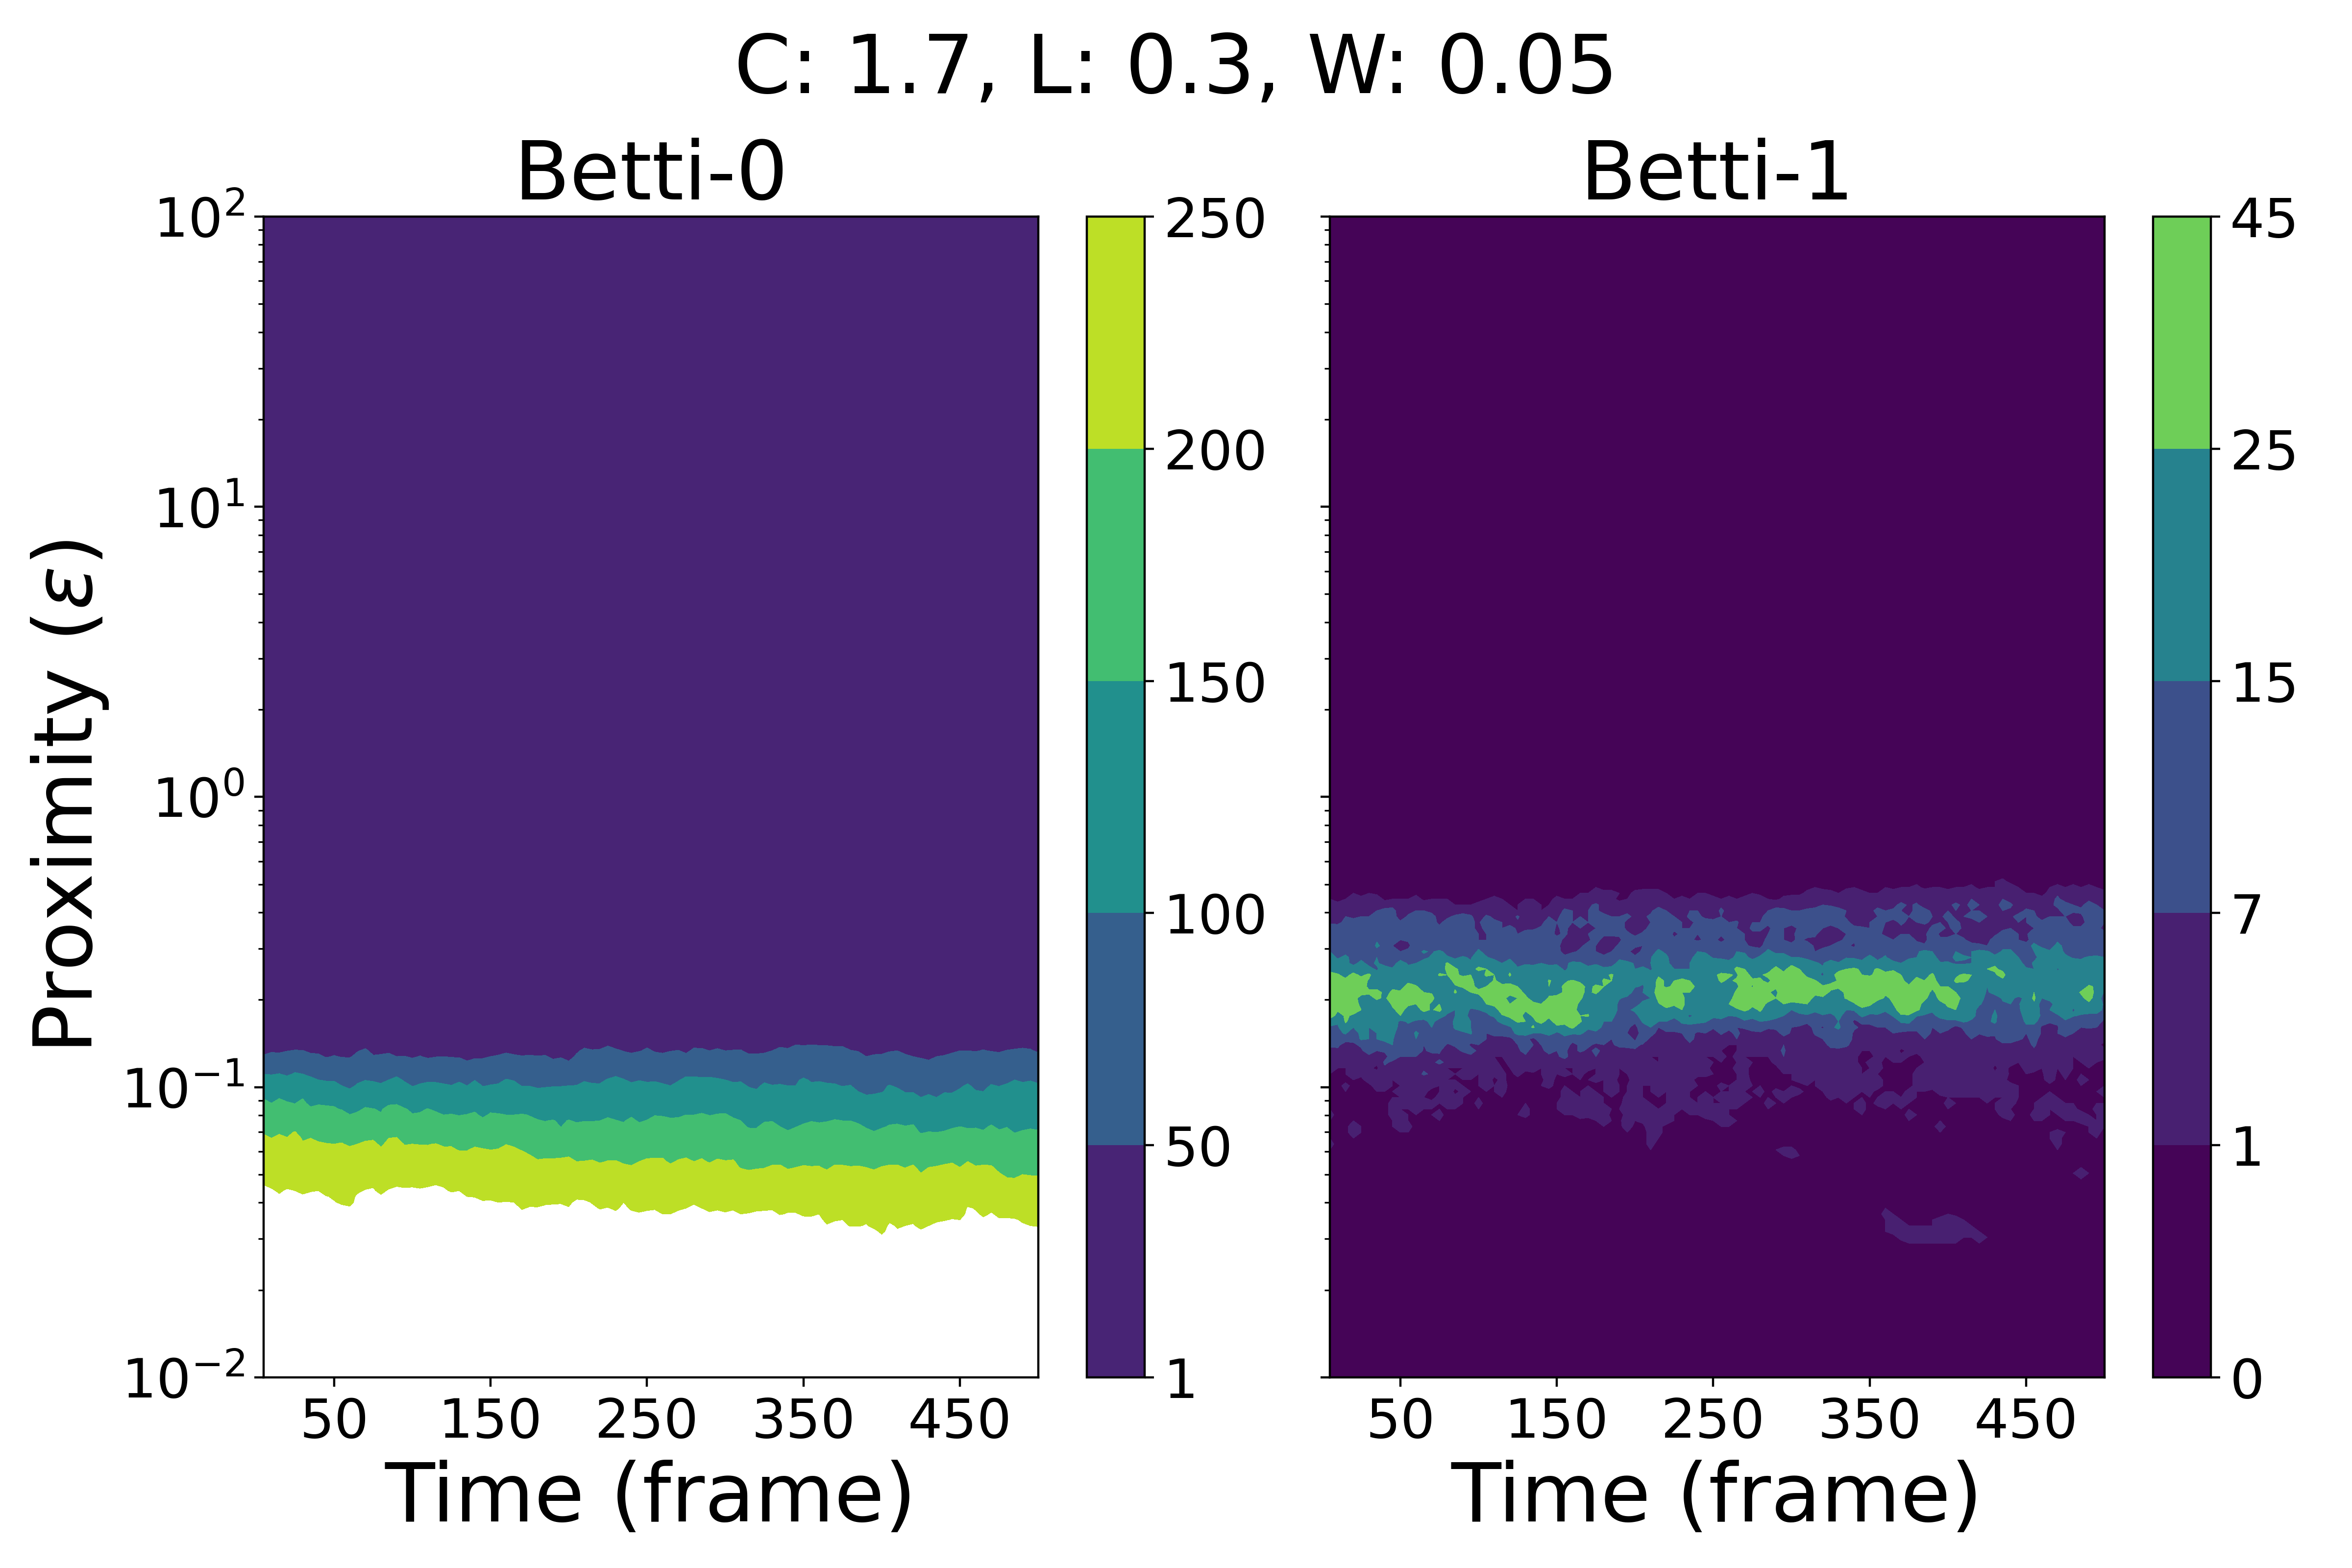

In [5]:
from Modules.TDA2_get_crockers import get_crockers

'''Compute crockers for specific Betti numbers given a trajectory dataframe.

Inputs:
    C -  Ratio of magnitude of attractive and respulive forces
    L - Ratio of range of attractive and respulive forces
    W - Alignment parameter

Requirements: 
    df.pkl - the resulting TDA dataframe of cells over the simulation
    
Output: 
    crocker_angles.npy - the array of crocker angles that form the crocker plot
    
'''

# calculate the crocker plot
crockers = get_crockers(C,L,W)

# display crocker plot 
CLW_crocker_name = f"Chosen_C_{str(C).zfill(2)}_L_{str(L).zfill(2)}_W_{str(W).zfill(2)}/crocker_plot.png"
display(Image(filename=CLW_crocker_name, width=600))

### Step 2: Approximate Bayesian Computation

#### 2a. Generate random samples

The goal is to run a large amount of ABC simulations. However, this is a very time and space consuming process. A sample of 30 random simulations has been pre-run but for more thourough analysis, closer to 10,000 samples is recommended. ~~THE CODE FOR THAT WILL BE INCLUDED??~

In [7]:
from Modules.ABC1_run_ABC_once import run_ABC_once

'''Run ABM simulation for random values of C,L,W over a specified time period

Inputs:
    T0 - Initial time of simulation
    TF - End time of simulation
    DT - How often to make a new frame of data
    num_agents - number of cell agents to be in the simulation
    
Requirements:
    ic_vec.npy - vector of initial conditions
    
Output: 
    df.pkl - the resulting dataframe of cells over the simulation with random C, L, and W values
    pars.npy - file of parameters used in random simulation
    random_ABC_simulation.gif - gif of random C,L,W simulation
    
'''

# if you want to run one random simulation, you can do so here 
single_random_ABC = run_ABC_once(T0,TF,DT,num_agents)

# display simulation gif
display(HTML('<img src="single_ABC_sample/random_ABC_simulation.gif">'))

# example path to one of 30 simulations 
samples_path = './sample_30/run_1/df.pkl'

#### 2b. Calculate crocker plots for random samples 

This step is also very time consuming and similarly has been uploaded with an option to calculate the crocker plot for the single simulation ran in the previous step. 

In [9]:
# upload the results of 10,000 crocker plots on our random samples

from Modules.ABC2_run_ABC_crocker_once import run_ABC_crocker_once

'''Compute crockers for specific Betti numbers given a trajectory dataframe for random C,L,W values

Inputs:
    C - Ratio of magnitude of attractive and respulive forces
    L - Ratio of range of attractive and respulive forces
    W - Alignment parameter
    T0 - Initial time of simulation
    TF - End time of simulation
    DT - How often to make a new frame of data
    num_agents - number of cell agents to be in the simulation
    
Requirements:
    df.pkl - the resulting dataframe of cells over the simulation with random C, L, and W values
    
Output: 
    crocker_angles.npy - crocker values of random C,L,W simulation
    
    
'''

# calculate the crocker plot of your one random sample
single_random_ABC = run_ABC_crocker_once()

# example path to one of 30 simulations 
crockers_path = './sample_30/run_1/crocker_angles.npy'

300 points in frame 119

#### 2c. Calculate samples losses for each crocker plot 

Now we will begin comparing our ABC results to our ground truth simulation from step 1. 

In [11]:
# calculate the sample loss and distance between our ground truth results and ABC results 

from Modules.ABC3_compute_losses import compute_losses

'''Compute sample losses between ground truth and random ABC simulations and crocker plots 

Inputs:
    C - Ratio of magnitude of attractive and respulive forces
    L - Ratio of range of attractive and respulive forces
    W - Alignment parameter
    samples_path - path to the 30 random samples
    num_samples - number of samples contained in samples_path

Requirements:
    (Chosen) crocker_angles.npy - crocker values of chosen C,L,W simulation
    (Random) crocker_angles.npy - crocker values of random C,L,W simulation
    pars.npy - file of parameters used in random simulation
    
Output: 
    sample_losses_angles.npy - file of sample losses calculated for the 30 samples 
    
'''
samples_path = './sample_30'
num_samples = 30
sample_losses = compute_losses(C,L,W,samples_path,num_samples)

#### 2d. Calculate ABC medians and posterior density plots 

From the sample losses, we can calculate the median values for ABC and create corresponding posterior density plots. 

In [13]:
# calculate medians 
from Modules.ABC4_medians import compute_medians_and_densities

'''Create posterior density plots for calculated sample losses and median ABC estimated values for C,L,W

Inputs:
    C - Ratio of magnitude of attractive and respulive forces
    L - Ratio of range of attractive and respulive forces
    W - Alignment parameter

Requirements:
    sample_losses_angles.npy - file of sample losses calculated for the 30 samples 
    
Output: 
    ABC_posterior_densities - folder containing 11 2D ABC posterior slices (1 for each W value)
    medians - ABC estimated median values for C,L,W
    
'''

medians = compute_medians_and_densities(C,L,W)

print('Medians: C='+str(medians[0])+' L='+str(medians[1])+' W='+str(medians[2]))

#output posterior density plots 
# for W_slice in range(11):
#     post_slices_name = f"Chosen_C_{str(C).zfill(2)}_L_{str(L).zfill(2)}_W_{str(W).zfill(2)}/ABC_posterior_densities/posterior_density_slice_at_w{str(W_slice).zfill(2)}.png"
#     display(Image(filename=post_slices_name, width=100))

html = ""
for W_slice in range(11):
    post_slices_name = f"Chosen_C_{str(C).zfill(2)}_L_{str(L).zfill(2)}_W_{str(W).zfill(2)}/ABC_posterior_densities/posterior_density_slice_at_w{str(W_slice).zfill(2)}.png"
    html += f'<img src="{post_slices_name}" width="200" style="margin-right:10px;" />'

display(HTML(html))

Medians: C=2.63068080018897 L=0.38790444069109364 W=0.036508176964483406


#### 2e. Run the ABC model simulations

Next we will run the ABC medians through our ABM simulation. 

In [15]:
# run ABC simulations 

from Modules.ABC5_run_ABC_sim import run_ABC_sim

'''Run ABM simulation for ABC median estimated values of C, L, and W over a specified time period

Inputs:
    C - Ratio of magnitude of attractive and respulive forces
    L - Ratio of range of attractive and respulive forces
    W - Alignment parameter
    T0 - Initial time of simulation
    TF - End time of simulation
    DT - How often to make a new frame of data
    num_agents - number of cell agents to be in the simulation

Requirements:
    ic_vec.npy - vector of initial conditions
    sample_losses_angles.npy - file of sample losses calculated for the 30 samples 
    
Output: 
    df_ABC.pkl - the resulting dataframe of cells over the simulation with random C, L, and W values
    medians.npy - the ABC median values 
    ABC_med_simulation.gif - gif of random C,L,W simulation
    
'''

run_ABC_sim(C,L,W,T0,TF,DT,num_agents)

# display simulation gif
ABC_med_gif_name = f"Chosen_C_{str(C).zfill(2)}_L_{str(L).zfill(2)}_W_{str(W).zfill(2)}/ABC_med_simulation.gif"
display(HTML(f'<img src="{ABC_med_gif_name}" />'))

#### 2f. Calculate the ABC crocker plots 

From the simulation, we can create an ABC crocker plot. 

300 points in frame 119

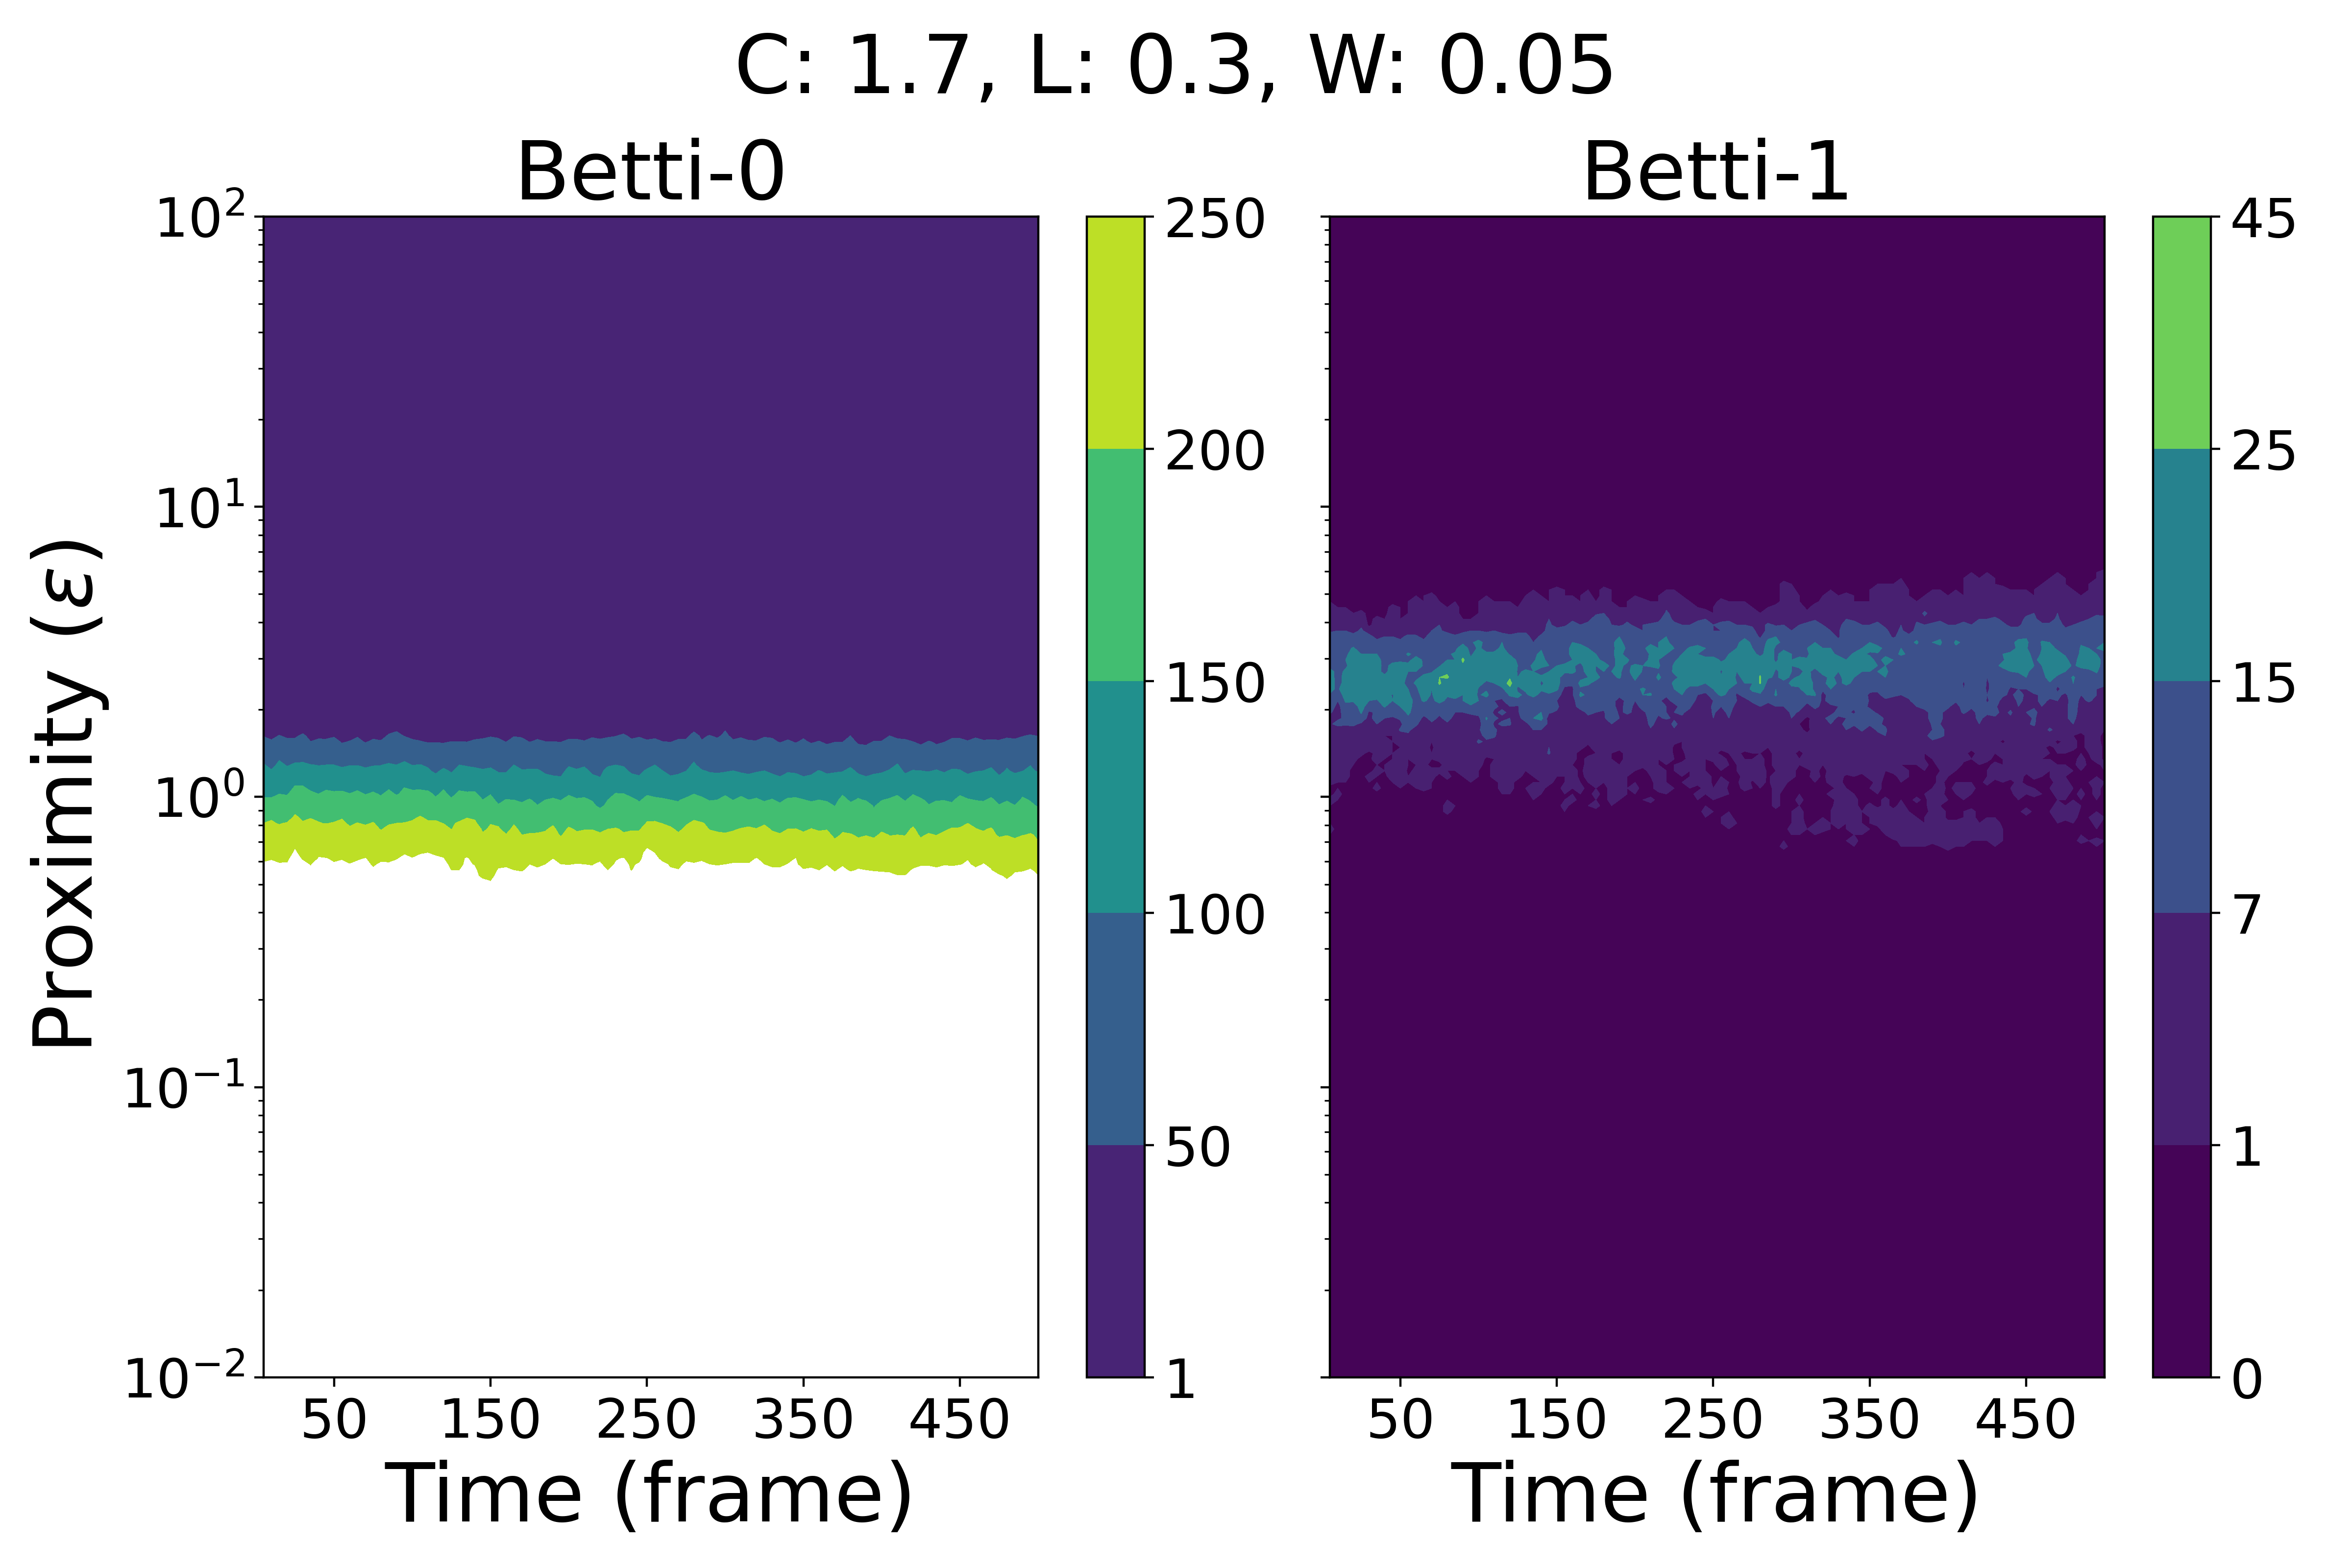

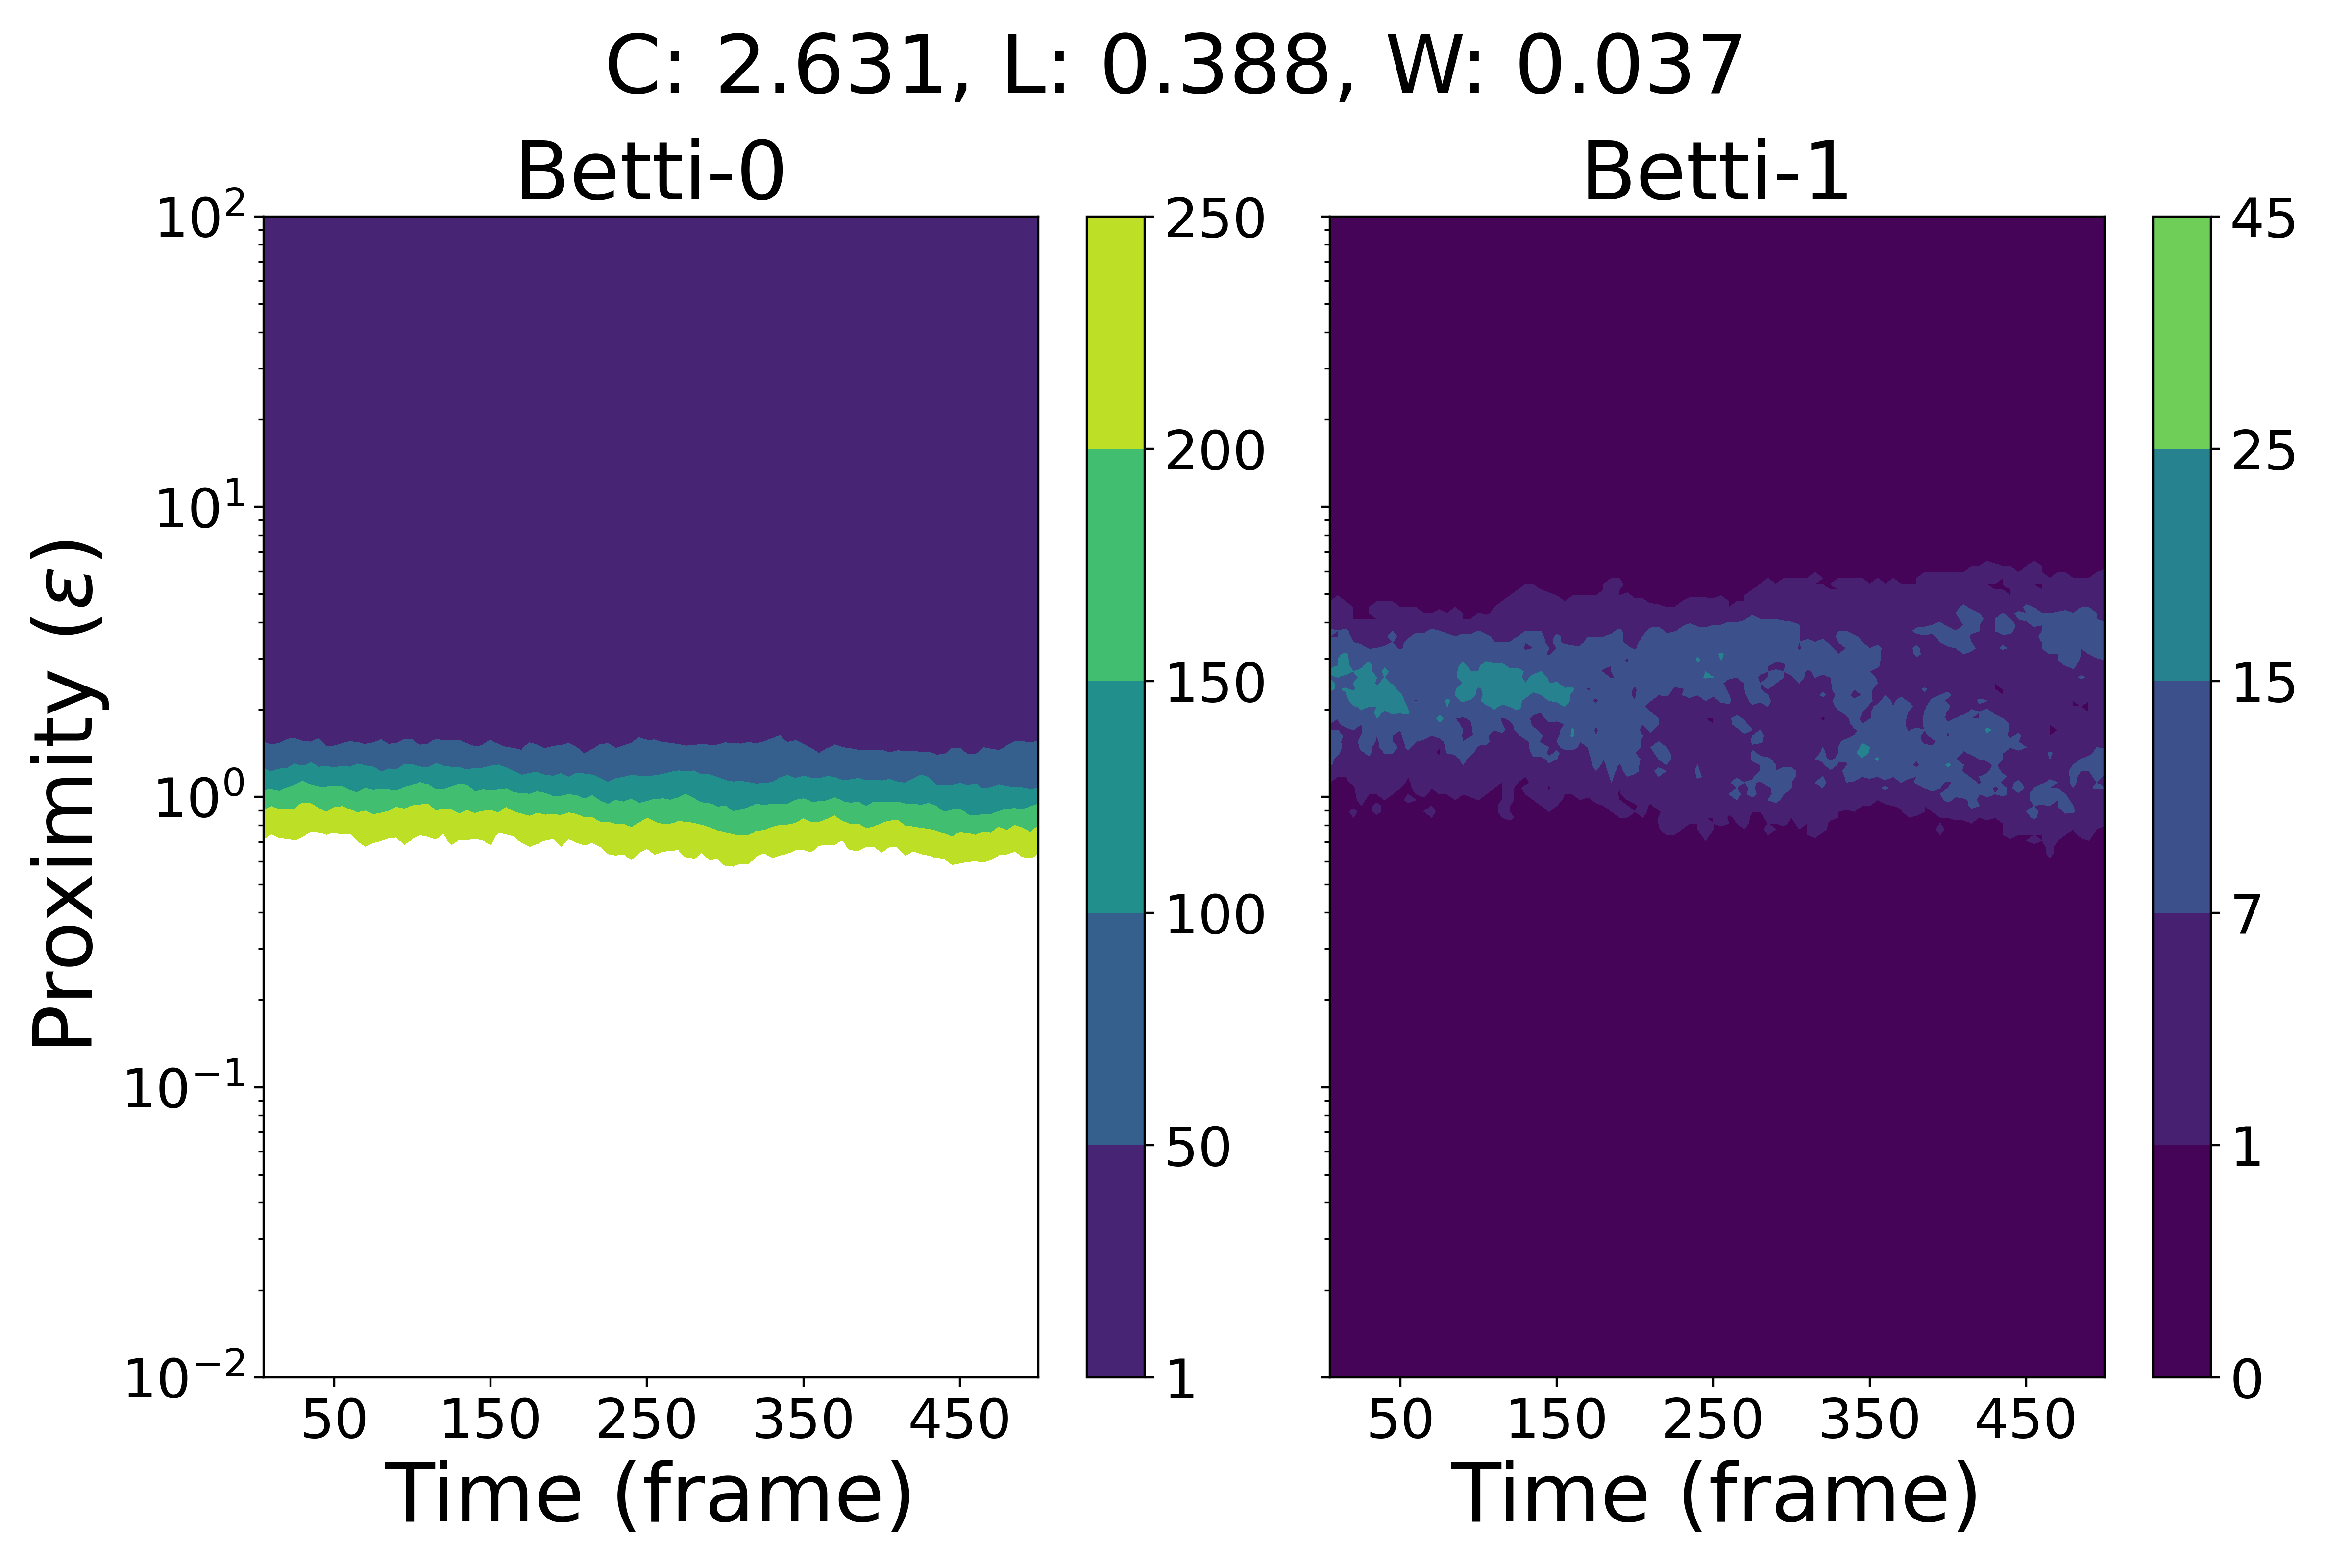

In [17]:
# run ABC crocker plot 

from Modules.ABC6_run_ABC_crocker import run_ABC_crocker

'''Compute crockers for specific Betti numbers given a trajectory dataframe for ABC median estimated C,L,W values

Inputs:
    C - Ratio of magnitude of attractive and respulive forces
    L - Ratio of range of attractive and respulive forces
    W - Alignment parameter
    T0 - Initial time of simulation
    TF - End time of simulation
    DT - How often to make a new frame of data
    num_agents - number of cell agents to be in the simulation

Requirements:
    df.pkl - Ground truth data frame simulation
    medians.npy - ABC median values
    df_ABC.pkl - ABC median data frame simulation
    
Output: 
    true_crocker.png - Ground truth crocker plot 
    ABC_crocker.png - ABC median crocker plot 
    crocker_differences.npy - calculated difference between the two crocker plots 
    
'''

run_ABC_crocker(C,L,W,T0,TF,DT,num_agents)

# display true crocker plot 
true_crocker_name = f"Chosen_C_{str(C).zfill(2)}_L_{str(L).zfill(2)}_W_{str(W).zfill(2)}/true_crocker.png"
display(Image(filename=true_crocker_name, width=600))

# display ABC crocker plot 
ABC_crocker_name = f"Chosen_C_{str(C).zfill(2)}_L_{str(L).zfill(2)}_W_{str(W).zfill(2)}/ABC_crocker.png"
display(Image(filename=ABC_crocker_name, width=600))

### Step 3: Bayesian Information Criterion

#### 3a. Calculate the BIC score

Now we will calculate the BIC score from the SSE between the ground truth model and ABC estimated model results.

In [19]:
from Modules.BIC_calc_bic import calc_bic

'''Calculate the BIC score for the simulation of our chosen C, L, and W values compared to the ABC estimate

Inputs:
    C - Ratio of magnitude of attractive and respulive forces
    L - Ratio of range of attractive and respulive forces
    W - Alignment parameter

Requirements:
    crocker_differences.npy - file of difference values between ground truth crocker and ABC crocker
    
Output: 
    BIC Score - Score of model based on BIC formula
    SSE - SSE between ground truth and ABC estimated crockers
    
'''

[bic_score,sse_score] = calc_bic(C,L,W)

print('BIC Score: ' + str(bic_score) + ' SSE: ' + str(sse_score))

BIC Score: 1223098.872560573 SSE: 1149552
